In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Step 1: Load the processed dataset
file_path = '../data/final_team_cluster_data2.csv'
final_team_cluster_data = pd.read_csv(file_path)

In [3]:
# Add league labels
matches_file_path = '../data/ginf.csv'
matches_data = pd.read_csv(matches_file_path)
team_league_map = pd.concat([matches_data[['ht', 'league']], matches_data[['at', 'league']].rename(columns={'at': 'ht'})])
team_league_map = team_league_map.drop_duplicates().set_index('ht')['league'].to_dict()
final_team_cluster_data['league'] = final_team_cluster_data['event_team'].map(team_league_map)


In [4]:
# Prepare data
X = final_team_cluster_data.drop(columns=['event_team', 'league'])
y = final_team_cluster_data['league']

In [5]:
# Step 2: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [6]:
# Step 3: Train a supervised classifier (Random Forest)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# Step 4: Make predictions and evaluate
y_pred = clf.predict(X_test)

In [8]:
# Metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.84
F1-Score: 0.84

Classification Report:
              precision    recall  f1-score   support

          D1       1.00      0.75      0.86         8
          E0       0.80      1.00      0.89         8
          F1       0.78      0.78      0.78         9
          I1       0.80      0.89      0.84         9
         SP1       0.88      0.78      0.82         9

    accuracy                           0.84        43
   macro avg       0.85      0.84      0.84        43
weighted avg       0.85      0.84      0.84        43



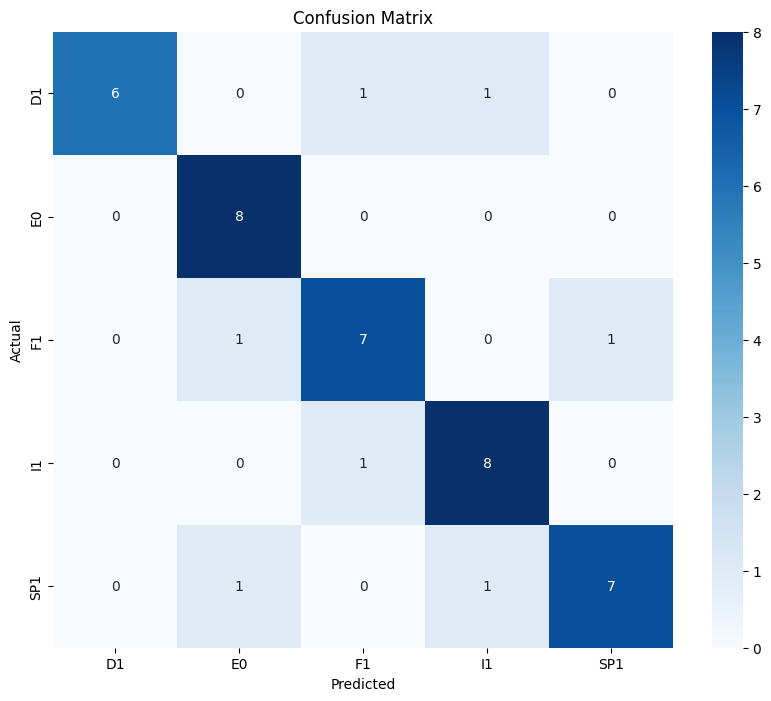

In [9]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=clf.classes_)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=clf.classes_, yticklabels=clf.classes_, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()